In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math
import networkx as nx  # it draws the connections to all the points.

In [2]:
#pip install mlxtend------------------------------> for bigger algo we cant go with this

In [3]:
transaction = pd.read_csv('F://transaction-1.csv')

In [4]:
transaction.head()

,Transaction
0,"Milk,Onion,Nutmeg,Kidney Beans,Eggs,Yogurt"
1,"Dill,Onion,Nutmeg,Kidney Beans,Eggs,Yogurt"
2,"Milk,Apple,Kidney Beans,Eggs"
3,"Milk,Unicorn,Corn,Kidney Beans,Yogurt"
4,"Corn,Onion,Onion,Kidney Beans,Ice cream,Eggs"


In [5]:
#talent acquition in linkedin

In [6]:
# there are 11 items are there, ----> 

##### Understanding:
- what product is hihly purchased.
- at what product discount should be given
- how each products are related
- Store Arrangements.

In [7]:
def intolist(desc):
    return desc.split(',')

In [9]:
transaction['Transaction']= transaction['Transaction'].apply(intolist)
transaction.head()

,Transaction
0,"[Milk, Onion, Nutmeg, Kidney Beans, Eggs, Yogurt]"
1,"[Dill, Onion, Nutmeg, Kidney Beans, Eggs, Yogurt]"
2,"[Milk, Apple, Kidney Beans, Eggs]"
3,"[Milk, Unicorn, Corn, Kidney Beans, Yogurt]"
4,"[Corn, Onion, Onion, Kidney Beans, Ice cream, ..."


### WORD EMBEDDING:

In [10]:
from mlxtend.preprocessing import TransactionEncoder
te= TransactionEncoder()# list of transaction into DF

In [11]:
bolean_tr= te.fit_transform(transaction['Transaction'])
df = pd.DataFrame(data=bolean_tr,columns=te.columns_)
df

,Apple,Corn,Dill,Eggs,Ice cream,Kidney Beans,Milk,Nutmeg,Onion,Unicorn,Yogurt
0,False,False,False,True,False,True,True,True,True,False,True
1,False,False,True,True,False,True,False,True,True,False,True
2,True,False,False,True,False,True,True,False,False,False,False
3,False,True,False,False,False,True,True,False,False,True,True
4,False,True,False,True,True,True,False,False,True,False,False


In [12]:
# for this data we should apply APRIORI algo or Association rule technique

In [14]:
from mlxtend.frequent_patterns import apriori, association_rules

In [30]:
df_ap= apriori(df,min_support=0.5, use_colnames=True)
df_ap        # this gives me probability of all values min_support is threshold

,support,itemsets
0,0.8,(Eggs)
1,1.0,(Kidney Beans)
2,0.6,(Milk)
3,0.6,(Onion)
4,0.6,(Yogurt)
5,0.8,"(Kidney Beans, Eggs)"
6,0.6,"(Onion, Eggs)"
7,0.6,"(Milk, Kidney Beans)"
8,0.6,"(Kidney Beans, Onion)"
9,0.6,"(Kidney Beans, Yogurt)"


In [39]:
# Applying rules
df_ar = association_rules(df_ap, metric='lift',min_threshold=1.1)
df_ar


# antecedents---> is input
# consequents is output

# select confidence ---> only if lift is more than one.

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Onion),(Eggs),0.6,0.8,0.6,1.00,1.25,0.12,inf
1,(Eggs),(Onion),0.8,0.6,0.6,0.75,1.25,0.12,1.6
2,"(Kidney Beans, Onion)",(Eggs),0.6,0.8,0.6,1.00,1.25,0.12,inf
3,"(Kidney Beans, Eggs)",(Onion),0.8,0.6,0.6,0.75,1.25,0.12,1.6
4,(Onion),"(Kidney Beans, Eggs)",0.6,0.8,0.6,1.00,1.25,0.12,inf
5,(Eggs),"(Kidney Beans, Onion)",0.8,0.6,0.6,0.75,1.25,0.12,1.6


In [40]:
tree= df_ar[['antecedents','consequents']]

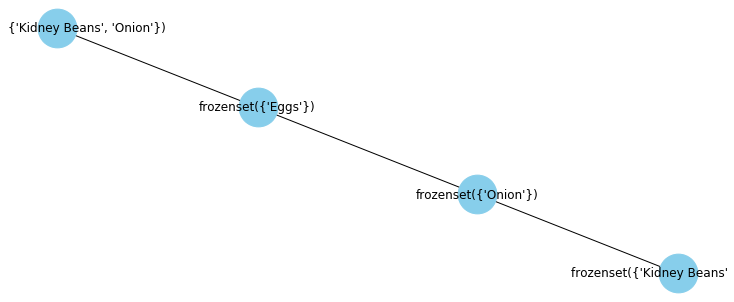

In [43]:
#build your graph:
G= nx.from_pandas_edgelist(tree,'antecedents','consequents')

plt.figure(figsize=(10,4))
nx.draw(G, with_labels=True, node_color='skyblue',node_size=1500, 
        edge_cmap= plt.cm.Blues)

plt.show()